<a href="https://colab.research.google.com/github/lucasmeirellesmachado/CDIA-Estatistica_II/blob/main/Atividade_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Importando a base de dados
base = pd.read_csv('https://raw.githubusercontent.com/lucasmeirellesmachado/CDIA-Estatistica_II/refs/heads/main/Nao%20comparecimento.csv', sep=';', decimal=',')

In [27]:
pd.options.display.max_columns = None
base.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


### Organização do banco de dados para análise exploratória



In [33]:
# Convertendo para o formato datetime da coluna "ScheduledDay"
base['ScheduledDay'] = pd.to_datetime(base['ScheduledDay'])

# Removendo a parte do horário (ficando apenas com a data)
base['Data agendamento'] = base['ScheduledDay'].dt.date

In [34]:
# Convertendo para o formato datetime da coluna "AppointmentDay"
base['AppointmentDay'] = pd.to_datetime(base['AppointmentDay'])

# Removendo a parte do horário (ficando apenas com a data)
base['Data consulta'] = base['AppointmentDay'].dt.date

In [35]:
base

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Data agendamento,Data consulta
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4.262960e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,8.679510e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8.841190e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07
110523,3.596270e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07
110524,1.557660e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07
110525,9.213490e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07


In [36]:
base = base.drop(['PatientId', 'AppointmentID'], axis=1)

In [37]:
base

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Data agendamento,Data consulta
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2016-05-03,2016-06-07
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,2016-04-27,2016-06-07


In [38]:
# Substituindo os valores 1 por 'Sim' e 0 por 'Não' em várias colunas para realizar análise exploratória
base[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']] = base[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'No-show']].replace({1: 'Sim', 0: 'Não'})

In [39]:
# Substituindo as letras F por 'Feminino' e M por 'Masculino' na coluna "Gender" para realizar análise exploratória
base[['Gender']] = base[['Gender']].replace({'F': 'Feminino', 'M': 'Masculino'})

In [40]:
base

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Data agendamento,Data consulta
0,Feminino,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,Não,Sim,Não,Não,0,Não,Não,2016-04-29,2016-04-29
1,Masculino,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Não,Não,Não,Não,0,Não,Não,2016-04-29,2016-04-29
2,Feminino,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,Não,Não,Não,Não,0,Não,Não,2016-04-29,2016-04-29
3,Feminino,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,Não,Não,Não,Não,0,Não,Não,2016-04-29,2016-04-29
4,Feminino,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,Não,Sim,Sim,Não,0,Não,Não,2016-04-29,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,Feminino,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,Não,Não,Não,Não,0,Sim,Não,2016-05-03,2016-06-07
110523,Feminino,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,Não,Não,Não,Não,0,Sim,Não,2016-05-03,2016-06-07
110524,Feminino,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,Não,Não,Não,Não,0,Sim,Não,2016-04-27,2016-06-07
110525,Feminino,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,Não,Não,Não,Não,0,Sim,Não,2016-04-27,2016-06-07


### Análise exploratória

In [41]:
#Média e dispersão da idade
base['Age'].describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


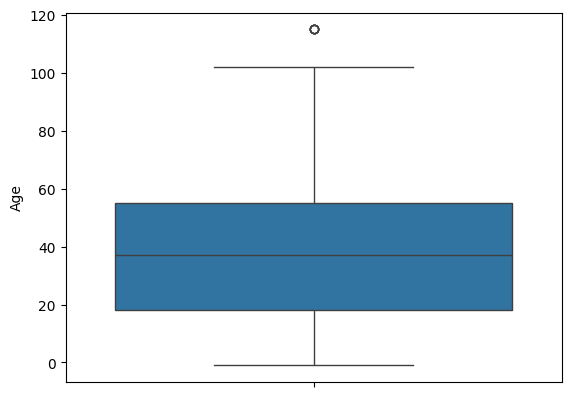

In [42]:
# Visualização gráfica da dispersão da idade
sns.boxplot(y = 'Age', data = base)
plt.xticks(rotation=90)
plt.show()

In [53]:
# Contagem e proporção de atendimentos por bairro

pd.set_option('display.max_rows', None)
base['Neighbourhood'].value_counts(normalize=True)*100

,proportion
Neighbourhood,
JARDIM CAMBURI,6.982004
MARIA ORTIZ,5.252110
RESISTÊNCIA,4.008975
JARDIM DA PENHA,3.507740
ITARARÉ,3.179314
CENTRO,3.016458
TABUAZEIRO,2.833697
SANTA MARTHA,2.832792
JESUS DE NAZARETH,2.581270
